In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Regresja **softmax**

In [3]:
s = [0.2, 0.1, 0.6, 0.1]
exps = [np.exp(i) for i in s]
sum_of_exps = sum(exps)
softmax = [j/sum_of_exps for j in exps]

##3 gangi

Zbiór danych:

In [4]:
x_label0 = np.random.normal(1, 1.5, (1000, 1))
y_label0 = np.random.normal(1, 1.5, (1000, 1))
x_label1 = np.random.normal(5, 1.5, (1000, 1))
y_label1 = np.random.normal(4, 1.5, (1000, 1))
x_label2 = np.random.normal(8, 1.5, (1000, 1))
y_label2 = np.random.normal(0, 1.5, (1000, 1))

In [5]:
data_label0 = np.concatenate([x_label0, y_label0],axis=1)
data_label1 = np.concatenate([x_label1, y_label1],axis=1)
data_label2 = np.concatenate([x_label2, y_label2],axis=1)
points = np.concatenate([data_label0, data_label1, data_label2],axis=0)

Kodowanie one-hot

In [6]:
labels = np.array([[1., 0., 0.]] * len(data_label0) + [[0., 1., 0.]] * len(data_label1) + [[0.,0., 1.]] * len(data_label2))

In [7]:
points.shape,labels.shape

((3000, 2), (3000, 3))

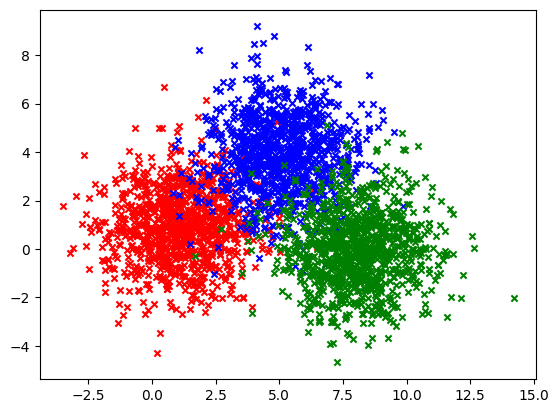

In [8]:
plt.scatter(x_label0, y_label0, c='r', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='b', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='x', s=20)
plt.show()

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units = 3, use_bias=True, input_dim=2, activation = "softmax"))

In [11]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.Adam()
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [12]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
epochs = 1000
#h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)
h = model.fit(points,labels, verbose=1, epochs=epochs, batch_size= 70, validation_split=0.2)

Epoch 1/1000
35/35 [==============================] - 1s 7ms/step - loss: 2.0618 - val_loss: 2.5691
Epoch 2/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.9212 - val_loss: 2.4962
Epoch 3/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.7915 - val_loss: 2.4295
Epoch 4/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.6711 - val_loss: 2.3650
Epoch 5/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.5608 - val_loss: 2.3023
Epoch 6/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.4596 - val_loss: 2.2403
Epoch 7/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.3658 - val_loss: 2.1740
Epoch 8/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.2793 - val_loss: 2.1088
Epoch 9/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.2007 - val_loss: 2.0400
Epoch 10/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.1295 - val_loss: 1.9718

In [15]:
Loss = h.history['loss']
Loss

[2.0617763996124268,
 1.9212372303009033,
 1.7914676666259766,
 1.6710587739944458,
 1.5607569217681885,
 1.459556221961975,
 1.3658262491226196,
 1.27925705909729,
 1.2007317543029785,
 1.129472017288208,
 1.0644110441207886,
 1.00711989402771,
 0.9553489089012146,
 0.9092105031013489,
 0.8680232763290405,
 0.8311546444892883,
 0.7984837889671326,
 0.7690183520317078,
 0.742433488368988,
 0.7189355492591858,
 0.6972973346710205,
 0.677888035774231,
 0.6598396301269531,
 0.643316388130188,
 0.6281505823135376,
 0.6137719750404358,
 0.6004946827888489,
 0.5879265069961548,
 0.5762277245521545,
 0.5650413036346436,
 0.5544906854629517,
 0.5445635914802551,
 0.5350667238235474,
 0.5260426998138428,
 0.5174195766448975,
 0.5091769695281982,
 0.5012447834014893,
 0.4936182200908661,
 0.48632457852363586,
 0.47927093505859375,
 0.4724253714084625,
 0.46589040756225586,
 0.45941483974456787,
 0.45331257581710815,
 0.4473567605018616,
 0.44161295890808105,
 0.43599623441696167,
 0.430592805147

In [16]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[-1.8542533   0.37775218  1.5208719 ]
 [-0.9898408   1.4547888  -1.4014187 ]]
[ 7.970148  -5.1614227 -8.469914 ]


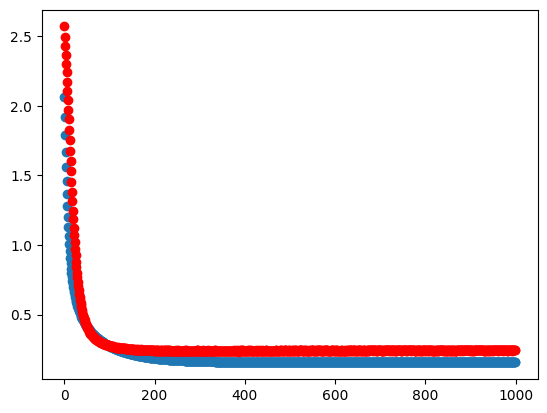

In [17]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

In [18]:
model.predict([[4,6]])

1/1 [==============================] - 0s 65ms/step


array([[2.8538452e-05, 9.9997139e-01, 1.2773766e-07]], dtype=float32)

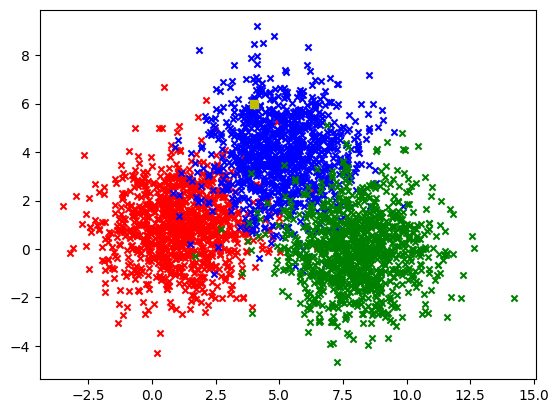

In [19]:
x=4.0
y=6.0
plt.scatter(x_label0, y_label0, c='r', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='b', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='x', s=20)
plt.scatter(x,y,c='y', marker='s')
plt.show()

##Number of epochs 100

In [20]:
model = Sequential()

In [21]:
model.add(Dense(units = 3, use_bias=True, input_dim=2, activation = "softmax"))

In [22]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.Adam()
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [23]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
epochs = 100
#h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)
h = model.fit(points,labels, verbose=1, epochs=epochs, batch_size= 70, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 1.4108 - val_loss: 2.9638
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 1.3174 - val_loss: 2.7759
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 1.2300 - val_loss: 2.5937
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 1.1499 - val_loss: 2.4175
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 1.0770 - val_loss: 2.2519
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 1.0116 - val_loss: 2.0945
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.9531 - val_loss: 1.9491
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.9012 - val_loss: 1.8120
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8556 - val_loss: 1.6822
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 0.8157 - val_loss: 1.5621
Epoch 11/

In [26]:
Loss = h.history['loss']
Loss

[1.4108127355575562,
 1.3173859119415283,
 1.2300409078598022,
 1.1499207019805908,
 1.0769740343093872,
 1.0115931034088135,
 0.9530754685401917,
 0.901232898235321,
 0.8555613160133362,
 0.8157284259796143,
 0.7810851335525513,
 0.7502753138542175,
 0.7227776646614075,
 0.6979568600654602,
 0.6755052208900452,
 0.6544113159179688,
 0.6353100538253784,
 0.6174570918083191,
 0.6009005904197693,
 0.5853168964385986,
 0.5706613063812256,
 0.5568481683731079,
 0.5437819957733154,
 0.5316267013549805,
 0.5200907588005066,
 0.5090818405151367,
 0.4986976087093353,
 0.48881566524505615,
 0.47939711809158325,
 0.4704488217830658,
 0.4619312584400177,
 0.4537387192249298,
 0.4458996057510376,
 0.43840745091438293,
 0.4311748147010803,
 0.4243384301662445,
 0.4177235960960388,
 0.41147294640541077,
 0.40534985065460205,
 0.39955851435661316,
 0.3939646780490875,
 0.38859185576438904,
 0.383461058139801,
 0.3785422444343567,
 0.3738558292388916,
 0.36934158205986023,
 0.3649357557296753,
 0.3607

In [27]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[-0.6192839   0.12776168  0.46283087]
 [-0.25504512  0.8719286  -0.91608995]]
[ 1.8876922 -2.4891806 -2.2122905]


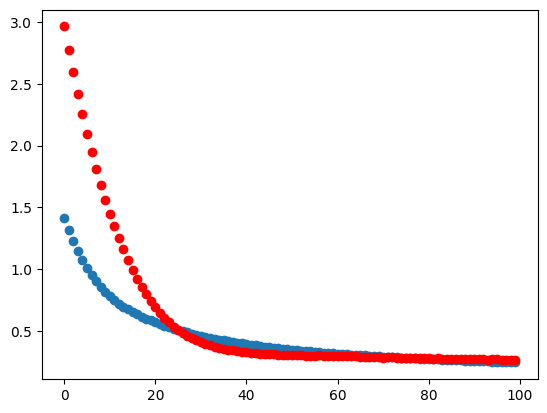

In [28]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

In [29]:
model.predict([[4,6]])

1/1 [==============================] - 0s 59ms/step


array([[4.6175518e-03, 9.9527246e-01, 1.0992816e-04]], dtype=float32)

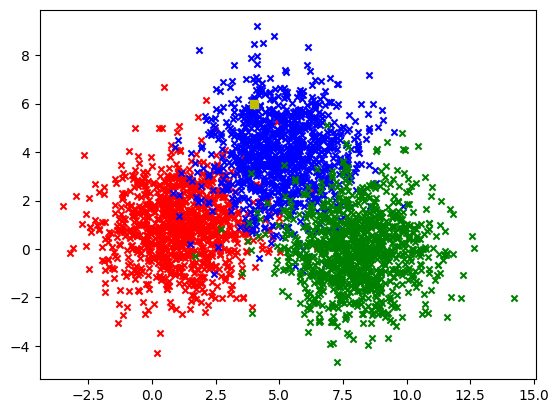

In [30]:
x=4.0
y=6.0
plt.scatter(x_label0, y_label0, c='r', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='b', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='x', s=20)
plt.scatter(x,y,c='y', marker='s')
plt.show()

##Number of epochs 2000

In [31]:
model = Sequential()

In [32]:
model.add(Dense(units = 3, use_bias=True, input_dim=2, activation = "softmax"))

In [33]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.Adam()
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [34]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
epochs = 2000
#h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)
h = model.fit(points,labels, verbose=1, epochs=epochs, batch_size= 70, validation_split=0.2)

Epoch 1/2000
35/35 [==============================] - 1s 6ms/step - loss: 1.5465 - val_loss: 1.3016
Epoch 2/2000
35/35 [==============================] - 0s 3ms/step - loss: 1.4835 - val_loss: 1.2127
Epoch 3/2000
35/35 [==============================] - 0s 3ms/step - loss: 1.4217 - val_loss: 1.1255
Epoch 4/2000
35/35 [==============================] - 0s 2ms/step - loss: 1.3607 - val_loss: 1.0442
Epoch 5/2000
35/35 [==============================] - 0s 2ms/step - loss: 1.3002 - val_loss: 0.9673
Epoch 6/2000
35/35 [==============================] - 0s 3ms/step - loss: 1.2411 - val_loss: 0.8901
Epoch 7/2000
35/35 [==============================] - 0s 2ms/step - loss: 1.1831 - val_loss: 0.8188
Epoch 8/2000
35/35 [==============================] - 0s 3ms/step - loss: 1.1265 - val_loss: 0.7569
Epoch 9/2000
35/35 [==============================] - 0s 2ms/step - loss: 1.0718 - val_loss: 0.6986
Epoch 10/2000
35/35 [==============================] - 0s 2ms/step - loss: 1.0184 - val_loss: 0.6401

In [37]:
Loss = h.history['loss']
Loss

[1.5465458631515503,
 1.4835166931152344,
 1.4217182397842407,
 1.3606691360473633,
 1.3002121448516846,
 1.2411288022994995,
 1.1830987930297852,
 1.1264872550964355,
 1.0717790126800537,
 1.0183722972869873,
 0.9662730097770691,
 0.915681779384613,
 0.867894172668457,
 0.8220105767250061,
 0.7781318426132202,
 0.736673891544342,
 0.6979741454124451,
 0.662034273147583,
 0.6293153166770935,
 0.6002790927886963,
 0.5746229887008667,
 0.5524584650993347,
 0.5333108901977539,
 0.5171647071838379,
 0.5033119320869446,
 0.4916301369667053,
 0.4814673960208893,
 0.47263726592063904,
 0.46474549174308777,
 0.45764607191085815,
 0.45107001066207886,
 0.445024311542511,
 0.4391305446624756,
 0.4336032569408417,
 0.428249716758728,
 0.4231055676937103,
 0.41815099120140076,
 0.4132876694202423,
 0.4085960388183594,
 0.40406301617622375,
 0.3995828330516815,
 0.39519786834716797,
 0.390957772731781,
 0.3867892324924469,
 0.38278257846832275,
 0.3787626028060913,
 0.37489309906959534,
 0.37112018

In [38]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[-1.9186313   0.37638855  1.6253421 ]
 [-1.0266261   1.4578031  -1.4661033 ]]
[ 8.280908 -5.164768 -9.07732 ]


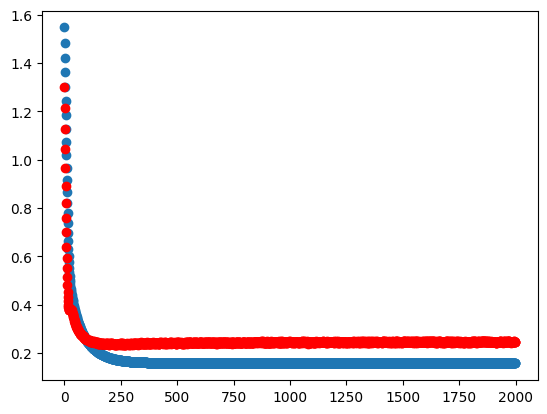

In [39]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

In [40]:
model.predict([[4,6]])

1/1 [==============================] - 0s 43ms/step


array([[2.3915041e-05, 9.9997592e-01, 7.1027500e-08]], dtype=float32)

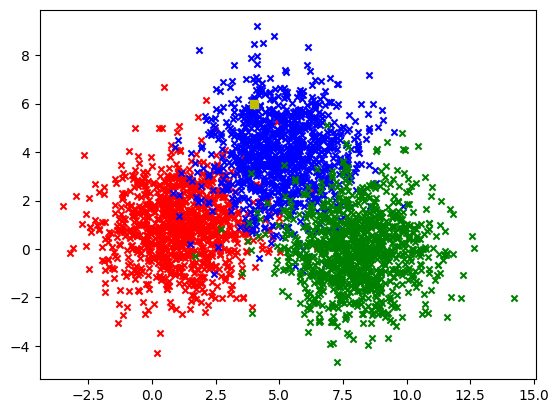

In [41]:
x=4.0
y=6.0
plt.scatter(x_label0, y_label0, c='r', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='b', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='x', s=20)
plt.scatter(x,y,c='y', marker='s')
plt.show()

##Learning rate 0.1

In [42]:
model = Sequential()

In [43]:
model.add(Dense(units = 3, use_bias=True, input_dim=2, activation = "softmax"))

In [44]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#opt = tf.keras.optimizers.Adam()
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [45]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
epochs = 1000
#h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)
h = model.fit(points,labels, verbose=1, epochs=epochs, batch_size= 70, validation_split=0.2)

Epoch 1/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.6316 - val_loss: 0.1873
Epoch 2/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.2370 - val_loss: 0.2132
Epoch 3/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1928 - val_loss: 0.2759
Epoch 4/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1752 - val_loss: 0.2422
Epoch 5/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1694 - val_loss: 0.2366
Epoch 6/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1639 - val_loss: 0.1976
Epoch 7/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1648 - val_loss: 0.2412
Epoch 8/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1625 - val_loss: 0.2577
Epoch 9/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1614 - val_loss: 0.2337
Epoch 10/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.1598 - val_loss: 0.1539

In [48]:
Loss = h.history['loss']
Loss

[0.6315537691116333,
 0.23698532581329346,
 0.19277913868427277,
 0.17522957921028137,
 0.16943445801734924,
 0.16391168534755707,
 0.1647959202528,
 0.16252253949642181,
 0.1613968163728714,
 0.1598430871963501,
 0.1606031358242035,
 0.15995313227176666,
 0.16306892037391663,
 0.158159539103508,
 0.16250407695770264,
 0.1622963398694992,
 0.1599254310131073,
 0.16003894805908203,
 0.16045255959033966,
 0.16260404884815216,
 0.16366077959537506,
 0.16276532411575317,
 0.1621885895729065,
 0.16017642617225647,
 0.16233040392398834,
 0.1603708565235138,
 0.16016343235969543,
 0.15926988422870636,
 0.16015614569187164,
 0.15996278822422028,
 0.1600867211818695,
 0.15837456285953522,
 0.16044892370700836,
 0.16056232154369354,
 0.16100414097309113,
 0.1625479757785797,
 0.16131840646266937,
 0.1601741909980774,
 0.15957164764404297,
 0.1580829620361328,
 0.1619000881910324,
 0.163047656416893,
 0.16236230731010437,
 0.16209180653095245,
 0.16641296446323395,
 0.1594562828540802,
 0.1597322

In [49]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[-1.9795942  0.4349273  1.706098 ]
 [-0.8989535  1.4161886 -1.5113696]]
[ 8.54315  -5.302328 -9.565231]


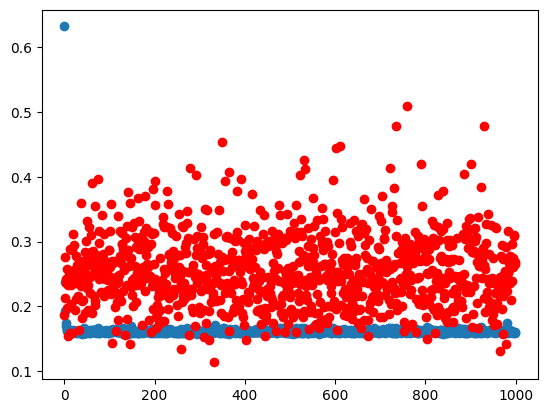

In [50]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

In [51]:
model.predict([[4,6]])

1/1 [==============================] - 0s 42ms/step


array([[6.1068109e-05, 9.9993896e-01, 5.3497580e-08]], dtype=float32)

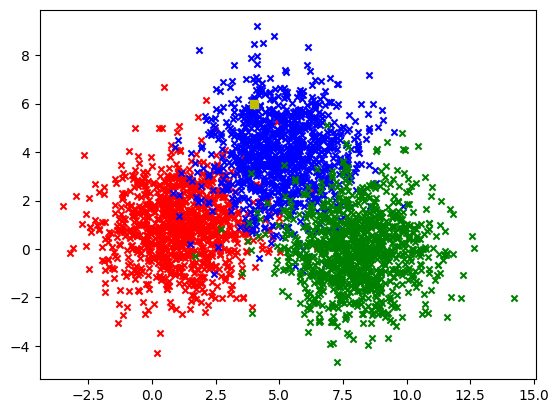

In [52]:
x=4.0
y=6.0
plt.scatter(x_label0, y_label0, c='r', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='b', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='x', s=20)
plt.scatter(x,y,c='y', marker='s')
plt.show()

##Learning rate 0.0001

In [53]:
model = Sequential()

In [54]:
model.add(Dense(units = 3, use_bias=True, input_dim=2, activation = "softmax"))

In [55]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
#opt = tf.keras.optimizers.Adam()
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [56]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
epochs = 1000
#h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)
h = model.fit(points,labels, verbose=1, epochs=epochs, batch_size= 70, validation_split=0.2)

Epoch 1/1000
35/35 [==============================] - 0s 5ms/step - loss: 1.2545 - val_loss: 2.0653
Epoch 2/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.2492 - val_loss: 2.0691
Epoch 3/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.2439 - val_loss: 2.0741
Epoch 4/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.2387 - val_loss: 2.0790
Epoch 5/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.2336 - val_loss: 2.0836
Epoch 6/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.2284 - val_loss: 2.0872
Epoch 7/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.2235 - val_loss: 2.0903
Epoch 8/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.2186 - val_loss: 2.0943
Epoch 9/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.2137 - val_loss: 2.0977
Epoch 10/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.2089 - val_loss: 2.1011

In [59]:
Loss = h.history['loss']
Loss

[1.254469394683838,
 1.2491517066955566,
 1.2438708543777466,
 1.238702416419983,
 1.2335504293441772,
 1.2284268140792847,
 1.2234528064727783,
 1.2185859680175781,
 1.2137058973312378,
 1.2088873386383057,
 1.2041045427322388,
 1.1994171142578125,
 1.1947468519210815,
 1.1901535987854004,
 1.1855915784835815,
 1.1811069250106812,
 1.1766947507858276,
 1.172338604927063,
 1.1679714918136597,
 1.1636728048324585,
 1.159426212310791,
 1.1552023887634277,
 1.151075005531311,
 1.1469495296478271,
 1.142859935760498,
 1.1388262510299683,
 1.13483464717865,
 1.1308097839355469,
 1.1268925666809082,
 1.122984766960144,
 1.1191320419311523,
 1.1153216361999512,
 1.1115212440490723,
 1.1077706813812256,
 1.1040534973144531,
 1.1003403663635254,
 1.096699595451355,
 1.0929968357086182,
 1.0893895626068115,
 1.0857828855514526,
 1.0822036266326904,
 1.07866632938385,
 1.07514488697052,
 1.0716487169265747,
 1.0681897401809692,
 1.0647097826004028,
 1.061306357383728,
 1.0578556060791016,
 1.0544

In [60]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[-0.86395454  0.15022355  0.5943968 ]
 [-0.38220945  0.91327024 -0.95378107]]
[ 3.0835235 -2.6992445 -2.9725344]


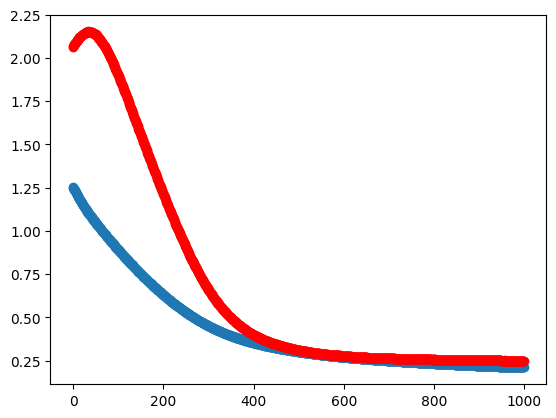

In [61]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

In [62]:
model.predict([[4,6]])

1/1 [==============================] - 0s 48ms/step


array([[2.3596396e-03, 9.9757916e-01, 6.1202118e-05]], dtype=float32)

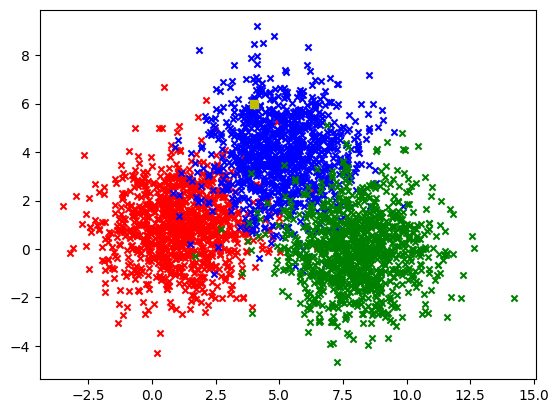

In [63]:
x=4.0
y=6.0
plt.scatter(x_label0, y_label0, c='r', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='b', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='x', s=20)
plt.scatter(x,y,c='y', marker='s')
plt.show()

#Minibatch

##Minibatch-20

In [64]:
model = Sequential()

In [65]:
model.add(Dense(units = 3, use_bias=True, input_dim=2, activation = "softmax"))

In [66]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
#opt = tf.keras.optimizers.Adam()
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [67]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
epochs = 1000
#h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)
h = model.fit(points,labels, verbose=1, epochs=epochs,  validation_split=0.2,batch_size=20)

Epoch 1/1000
120/120 [==============================] - 0s 2ms/step - loss: 1.3121 - val_loss: 0.6615
Epoch 2/1000
120/120 [==============================] - 0s 2ms/step - loss: 1.2865 - val_loss: 0.6377
Epoch 3/1000
120/120 [==============================] - 0s 2ms/step - loss: 1.2613 - val_loss: 0.6139
Epoch 4/1000
120/120 [==============================] - 0s 1ms/step - loss: 1.2364 - val_loss: 0.5913
Epoch 5/1000
120/120 [==============================] - 0s 2ms/step - loss: 1.2118 - val_loss: 0.5698
Epoch 6/1000
120/120 [==============================] - 0s 2ms/step - loss: 1.1875 - val_loss: 0.5493
Epoch 7/1000
120/120 [==============================] - 0s 2ms/step - loss: 1.1635 - val_loss: 0.5298
Epoch 8/1000
120/120 [==============================] - 0s 2ms/step - loss: 1.1398 - val_loss: 0.5111
Epoch 9/1000
120/120 [==============================] - 0s 1ms/step - loss: 1.1163 - val_loss: 0.4938
Epoch 10/1000
120/120 [==============================] - 0s 2ms/step - loss: 1.093

In [70]:
Loss = h.history['loss']
Loss

[1.3120723962783813,
 1.2865408658981323,
 1.2613133192062378,
 1.2364078760147095,
 1.2118088006973267,
 1.1874715089797974,
 1.1634660959243774,
 1.1397557258605957,
 1.1163179874420166,
 1.0931960344314575,
 1.0703883171081543,
 1.0479108095169067,
 1.0257350206375122,
 1.0039031505584717,
 0.9823871850967407,
 0.9612393975257874,
 0.9404220581054688,
 0.9199780225753784,
 0.8998789191246033,
 0.8801460862159729,
 0.8608221411705017,
 0.8418634533882141,
 0.8233051300048828,
 0.8051370978355408,
 0.7874065041542053,
 0.7700613141059875,
 0.7531483769416809,
 0.7366554141044617,
 0.7205888032913208,
 0.7049753665924072,
 0.6897748708724976,
 0.6750288605690002,
 0.6607075929641724,
 0.6468316316604614,
 0.6333843469619751,
 0.6203907132148743,
 0.6078225374221802,
 0.5956856608390808,
 0.5839625000953674,
 0.5726891160011292,
 0.5618271231651306,
 0.5513785481452942,
 0.5413265228271484,
 0.5316773056983948,
 0.5224139094352722,
 0.5135316848754883,
 0.5050197839736938,
 0.4968436062

In [71]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[-1.376739   0.3119349  1.0393476]
 [-0.7011174  1.2859708 -1.1403483]]
[ 5.670027 -4.416901 -5.620191]


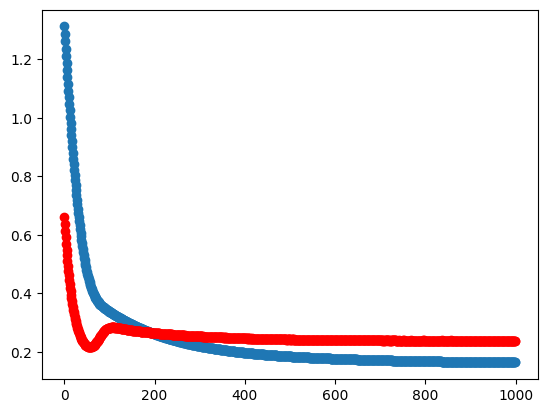

In [72]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

In [73]:
model.predict([[4,6]])

1/1 [==============================] - 0s 64ms/step


array([[1.858657e-04, 9.998116e-01, 2.621559e-06]], dtype=float32)

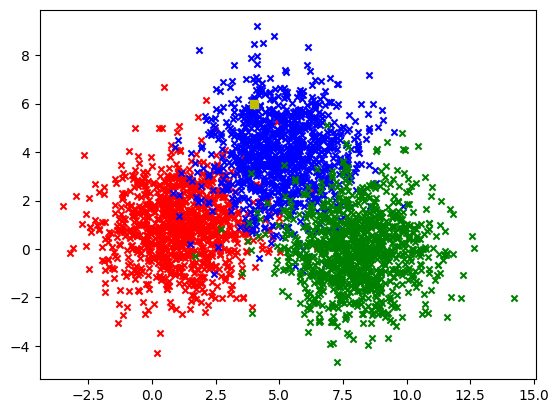

In [74]:
x=4.0
y=6.0
plt.scatter(x_label0, y_label0, c='r', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='b', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='x', s=20)
plt.scatter(x,y,c='y', marker='s')
plt.show()

##mini batch - 50

In [75]:
model = Sequential()

In [76]:
model.add(Dense(units = 3, use_bias=True, input_dim=2, activation = "softmax"))

In [77]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
#opt = tf.keras.optimizers.Adam()
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [78]:
model.compile(loss='binary_crossentropy',optimizer=opt)

In [79]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
epochs = 1000
#h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)
h = model.fit(points,labels, verbose=1, epochs=epochs, batch_size= 50, validation_split=0.2)

Epoch 1/1000
48/48 [==============================] - 1s 4ms/step - loss: 1.2790 - val_loss: 2.3513
Epoch 2/1000
48/48 [==============================] - 0s 2ms/step - loss: 1.2674 - val_loss: 2.3444
Epoch 3/1000
48/48 [==============================] - 0s 2ms/step - loss: 1.2559 - val_loss: 2.3382
Epoch 4/1000
48/48 [==============================] - 0s 2ms/step - loss: 1.2446 - val_loss: 2.3304
Epoch 5/1000
48/48 [==============================] - 0s 2ms/step - loss: 1.2335 - val_loss: 2.3241
Epoch 6/1000
48/48 [==============================] - 0s 2ms/step - loss: 1.2226 - val_loss: 2.3168
Epoch 7/1000
48/48 [==============================] - 0s 2ms/step - loss: 1.2118 - val_loss: 2.3096
Epoch 8/1000
48/48 [==============================] - 0s 2ms/step - loss: 1.2012 - val_loss: 2.3011
Epoch 9/1000
48/48 [==============================] - 0s 2ms/step - loss: 1.1908 - val_loss: 2.2939
Epoch 10/1000
48/48 [==============================] - 0s 2ms/step - loss: 1.1806 - val_loss: 2.2866

In [81]:
Loss = h.history['loss']
Loss

[1.279031753540039,
 1.267419457435608,
 1.2559131383895874,
 1.2446213960647583,
 1.2335107326507568,
 1.2225561141967773,
 1.2118299007415771,
 1.2012039422988892,
 1.1908282041549683,
 1.1805529594421387,
 1.1704579591751099,
 1.1605511903762817,
 1.150770664215088,
 1.141175389289856,
 1.1316996812820435,
 1.1224201917648315,
 1.1132633686065674,
 1.10425865650177,
 1.0954076051712036,
 1.0867059230804443,
 1.0781148672103882,
 1.0696955919265747,
 1.0613882541656494,
 1.0532139539718628,
 1.0451781749725342,
 1.037278175354004,
 1.0295050144195557,
 1.0218379497528076,
 1.0142754316329956,
 1.006855845451355,
 0.9995615482330322,
 0.99236661195755,
 0.9852756857872009,
 0.9782969951629639,
 0.971426784992218,
 0.9646472334861755,
 0.9579616189002991,
 0.9514078497886658,
 0.9449449777603149,
 0.9385504126548767,
 0.9322725534439087,
 0.9260651469230652,
 0.9199762940406799,
 0.9139391183853149,
 0.9079890847206116,
 0.9021456837654114,
 0.8963634967803955,
 0.890653669834137,
 0.8

In [82]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[-0.98609793  0.21861346  0.7294145 ]
 [-0.46031675  1.0607656  -0.997672  ]]
[ 3.722764  -3.4068813 -3.7914543]


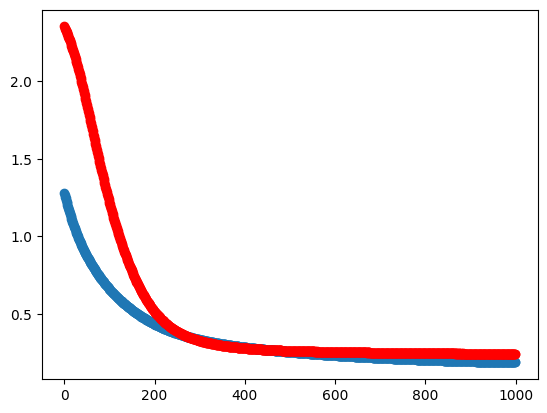

In [83]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

In [84]:
model.predict([[4,6]])

1/1 [==============================] - 0s 47ms/step


array([[1.0952058e-03, 9.9888200e-01, 2.2700757e-05]], dtype=float32)

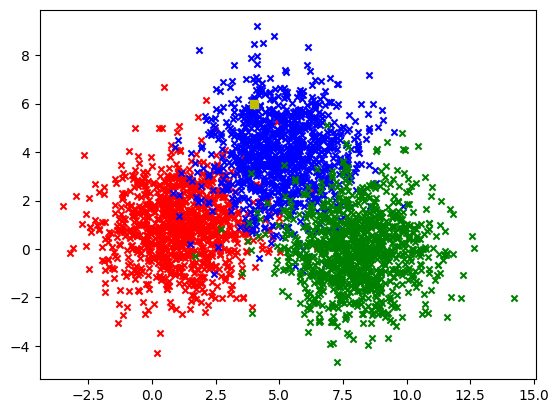

In [85]:
x=4.0
y=6.0
plt.scatter(x_label0, y_label0, c='r', marker='x', s=20)
plt.scatter(x_label1, y_label1, c='b', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='x', s=20)
plt.scatter(x,y,c='y', marker='s')
plt.show()

Najlepsze wyniki otrzymałem dla współczynnika uczenia 0.1, liczby epok 2000,batcha równego 20, najgorsze dla współczynnika uczenia 0.0001, liczby epok 100, batcha równego 50.